# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [np.random.randint(0, len(data)) for i in range(3)]
# I set a random seed up above inside all of the import statements.  Indices are 47, 117, 172

indices = sorted(indices)
print indices

[47, 117, 172]


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,44466,54259,55571,7782,24171,6465
1,6990,3880,5380,1647,319,1160
2,955,5479,6536,333,2840,707


----------------------------------------
Random samples distance from mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,32465.702273,48462.734091,47619.722727,4710.068182,21289.506818,4940.129545
1,-5010.297727,-1916.265909,-2571.277273,-1424.931818,-2562.493182,-364.870455
2,-11045.297727,-317.265909,-1415.277273,-2738.931818,-41.493182,-817.870455


----------------------------------------
Radom samples distance from median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,35962.0,50632.0,50815.5,6256.0,23354.5,5499.5
1,-1514.0,253.0,624.5,121.0,-497.5,194.5
2,-7549.0,1852.0,1780.5,-1193.0,2023.5,-258.5


----------------------------------------
Percentile Rankings


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,97.73,99.77,99.32,90.45,99.09,98.41
117,43.41,53.98,55.68,51.82,30.00,58.86
172,10.45,65.00,59.66,11.82,68.86,39.32


----------------------------------------


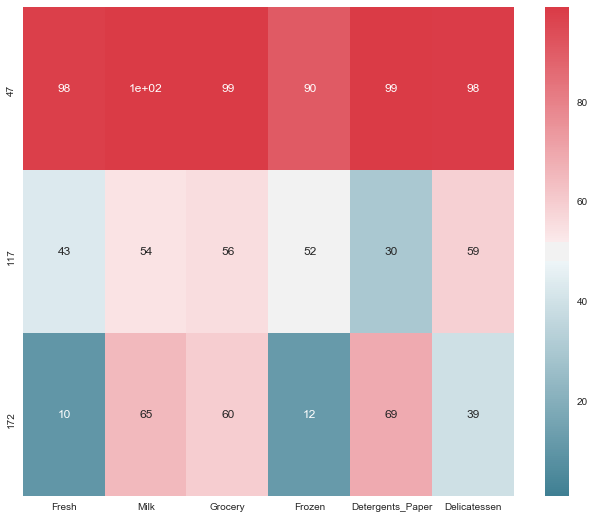

In [4]:
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# Let's see how our random samples relate to the mean and median of the data set

print "-" * 40
print "Random samples distance from mean:"
display(samples - data.mean().values)

print "-" * 40
print "Radom samples distance from median:"
display(samples - data.median().values)

# Looking at absolute values isn't very telling.  Let's see them as percentiles and see if that tells us anything.
percent_scores = data.rank(pct=True)
percent_scores = percent_scores.round(decimals=4) * 100
percent_scores = percent_scores.iloc[indices]
print "-" * 40
print "Percentile Rankings"
display(percent_scores)

print "-" * 40
# Summary statistics are more useful when visualized.  Let's create a heatmap of the deviation from mean and mode
# Let's visualize a Correlation Matrix to see if there are any relationships between categories
import seaborn as sns
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap?
sns.heatmap(percent_scores, cmap=cmap, vmin=1, vmax=99,
            square=False, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 

#### Random Sample 1 (Index 172):

My guess is that this establishment is likely a small corner store, or perhaps a pharmacy.  The intuition behind this guess is that the establishments main purchases are milk, grocery, and detergents/paper, which usually make up the brunt of product offerings at these sorts of establishments.  The detergents/paper category seems too high for this to be a restaurant or cafe, since these types of establishments only buy those sorts of products for internal use, and this value is much too high for that.  I also found the extremely low value in the fresh category very telling, since most corner stores/pharmacies sell basic groceries but stop short of offering fresh fruits and vegetables.  


#### Random Sample 2 (Index 47):

This establishment comes near the top of the charts in every single category, which eliminates many smaller, locally owned businesses just by sheer volume.  My guess for this establishment would be a large-scale "big box" store or franchised grocery chain.  If the average order is this high, that means that establishment moves a massive volume of products on a regular basis (this is probably a safe assumption, as we have no reason to believe that the amount of purchases in this year would be wildly different than any other year).  The only stores capable of purchasing, storing, and selling this much product for every category involved would almost certainly be corporately-owned grocery stores and general retailers.  Since I've been instructed to avoid using names of actual businesses, I'll talk around my guess by saying that this seems like the type of business that would be owned by the Walton family.  


#### Random Sample 3 (Index 117):

This establishment is a bit tougher, since everything seems generally pretty close to the median, with a few exceptions.  Unlike our last two random samples, there isn't any obvious high or low value in any category that we can really point to for an educated guess. My guess is that this establishment is a cafe or restaurant.  The reasoning behind this guess is the lower volume of detergents/paper (which would be consistent with a restaurant that needs to clean and stock kitchens/bathrooms, but isn't actually selling any of these products).  The near-median rankings of most values here also suggest that this is likely a restaurant of some sort, because food service establishments will likely make up the brunt of the list in any major city (a small city with 1 Wal Mart will still likely have dozens of cafes and restuarants in most areas). Although most categories for this sample rank slightly above the median, I noticed that every category ranks below the mean.  Although interesting, this does not likely give us much information we can make an educated guess on, since there are clearly extreme outliers such as sample 2 skewing the mean to the right.  

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

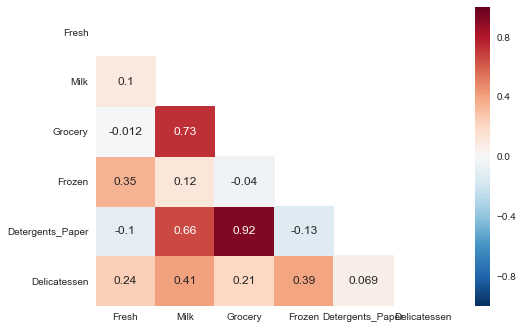

In [5]:
# Let's build a correlation matrix to see which one we should choose

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Highest correlation is between Detergents_Paper and Grocery.  We'll attempt to predict Detergents_Paper. 
categories = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
def regression_score(category):

    labels = data[category]
    new_data = data.drop([category], axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "score for {}: {} ".format(category, score)

for i in categories:
    regression_score(i)

score for Fresh: -0.252469807688 
score for Milk: 0.365725292736 
score for Grocery: 0.602801978878 
score for Frozen: 0.253973446697 
score for Detergents_Paper: 0.728655181254 
score for Delicatessen: -11.6636871594 


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

My model was able to predict the value of *Detergents/Paper* with an R<sup>2</sup> value of 72.86%.  This is good, although we don't know how this compares to other categories.  After abstracting the process out into a function,  I found that I could also predict *Grocery* with an R<sup>2</sup> score of 60.28%.  We could likely drop one or both of these categories to reduce dimensionality.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

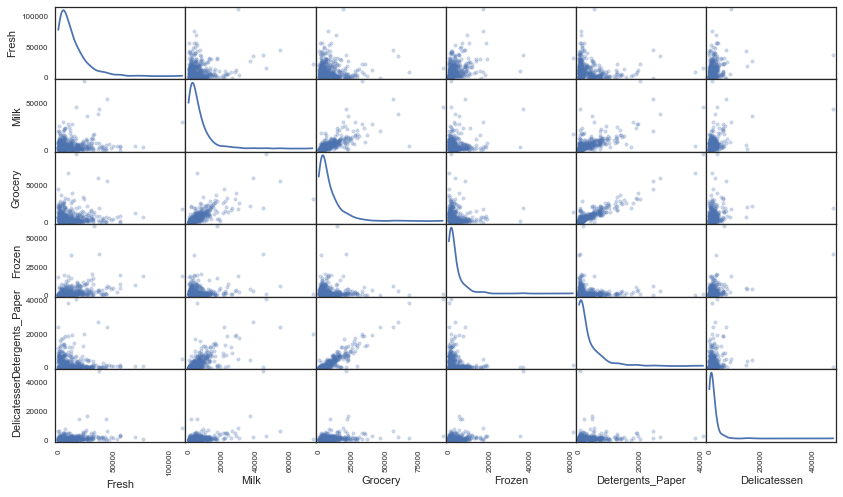

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** The strongest correlation appears to be between *Detergents/Paper* and *Grocery*.  This definitely confirmed my suspicions about the predictability of *Detergents/Paper*, although to fair, I went out of order and checked correlation up above (see heatmap) before running my regression, so this wasn't a surprise.   There also seem to be correlation between *Grocery* and *Milk*.  The data for all categories definitely seems to be skewed right.  

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

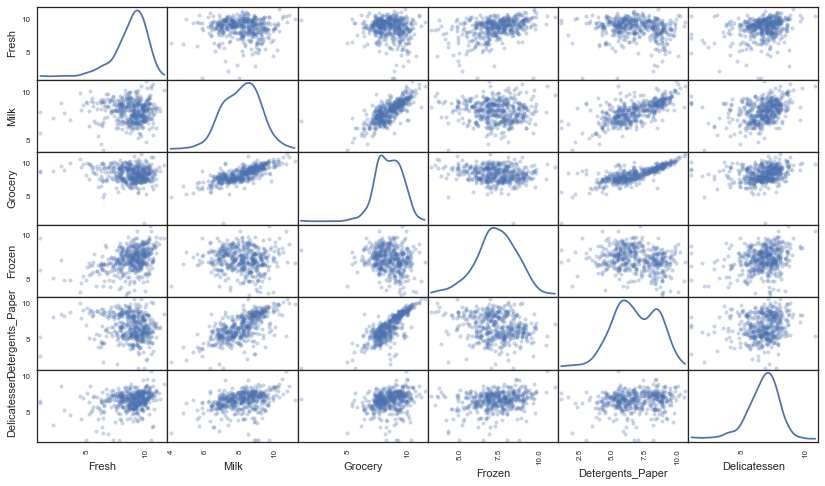

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
1,8.852236,8.263590,8.590444,7.406711,5.765191,7.056175
2,6.861711,8.608678,8.785081,5.808142,7.951559,6.561031


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
# For each feature find the data points with extreme high or low values
outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    #find values that qualify as outliers
    outlier_vals = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    # We have the values, but what we really need is the indices.  Then we can see which occur in multiple columns
    outliers += outlier_vals.index.tolist()
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

outliers = sorted(outliers)
print outliers

# Let's only drop the values that are outliers in multiple features.  That means we need to grab the indices 
# of outliers that appear more than once.  

mult_col_outliers = []
def get_repeat_offenders():
    outlier_hist = {}
    
    for i in outliers:
        if i in outlier_hist:
            outlier_hist[i] += 1
        else:
            outlier_hist[i] = 1
    
    for key, val in outlier_hist.iteritems():
        if val > 1:
            mult_col_outliers.append(key)

get_repeat_offenders()
print ""
print "###### Indices of outliers in multiple columns ######"
print mult_col_outliers
# OPTIONAL: Select the indices for data points you wish to remove
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[mult_col_outliers]).reset_index(drop = True)
print "Outliers have been removed!"

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]

###### Indices of outliers in multiple columns ######
[128, 154, 65, 66, 75]
Outliers have been removed!


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
I chose to remove 5 data points from the data set:  Indices 65, 66, 75, 128, and 154.  I chose to remove these data points because they were outliers in 2 different columns (except for 154, which was an outlier in 3).  We have a large amount of data, so in this case it's probably a safe assumption that its worth it to sacrifice these 5 data points in order to remove the influence of these outliers.  

I have visualized the outliers in a heatmap below.  This inlcudes the percentage rankings for each category for each specific data point.  All of our multi-feature outliers that have made this list appear to have done so because of a very low volume of purchases in at least two categories--with the exception of 65, which ranks towards the top for *Milk*, *Grocery*, and *Detergents/Paper*, with volume rankings of 96%, 99%, and 99%, respectively.  

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,85,20959,45828,36,24231,1423
1,9,1534,7417,175,3468,27
2,20398,1137,3,4407,3,975
3,140,8847,3823,142,1062,3
4,622,55,137,75,7,8


----------------------------------------


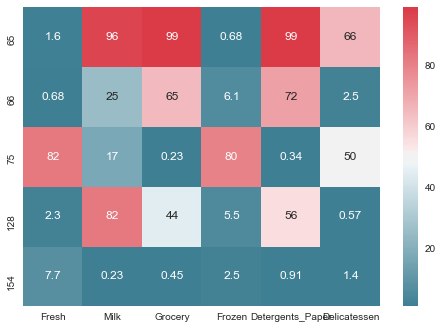

In [13]:
i = [65, 66, 75, 128, 154]

# Create a DataFrame consisting only of data points with outliers in multiple columns
samples = pd.DataFrame(data.loc[i], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

percent_scores = data.rank(pct=True)
percent_scores = percent_scores.round(decimals=4) * 100
percent_scores = percent_scores.iloc[i]

print "-" * 40
sns.heatmap(percent_scores, cmap=cmap, vmin=1, vmax=99,
            square=False, annot=True)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

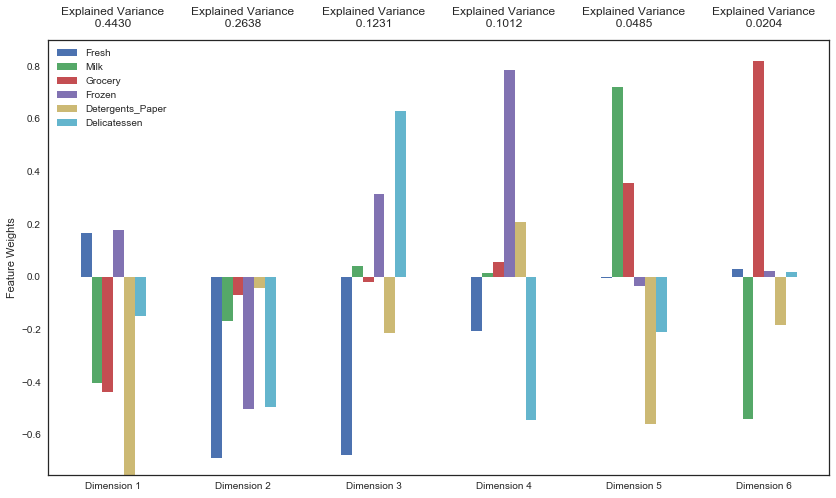

In [14]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=130)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**  Together, the 1st and 2nd dimensions explain 70.68% of the total variation.  When we add in the 3rd and 4th dimensions, the total explained variance jumps to 93.11%.  

**Dimension 1:** This dimension places a large negative weight on *Detergents/Paper* spending, smaller but still substantial negative weights on *Grocery* and *Milk* spending, and small positive weights on *Fresh* and *Frozen* spending.

**Dimension 2:**  This dimension consists solely of negative weights, with the largest being on spending for *Fresh*, followed by nearly equal weights on *Frozen* and *Delicatessen* spending.


**Dimension 3:**  This dimension's largest variance is captured by a negatively-weighted *Fresh* category, followed by smaller but still substantial positive weights for *Delicatessen* and *Frozen*.  


**Dimension 4:**  This dimension's largest variance is captured by positively weighted *Frozen* spending, followed by negatively weighted *Delicatessen* spending, and minor weights on *Detergents/Paper* and *Fresh* (positive and negative, respectively).  

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-4.3646,-3.9519,-0.1229,0.6240,0.5379,0.0551
1,0.6402,-0.2665,0.4171,-0.3569,0.6419,0.2337
2,-1.7705,1.9794,0.4978,-0.4638,-0.0994,-0.2924


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
# display(reduced_data)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-4.3646,-3.9519
1,0.6402,-0.2665
2,-1.7705,1.9794


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

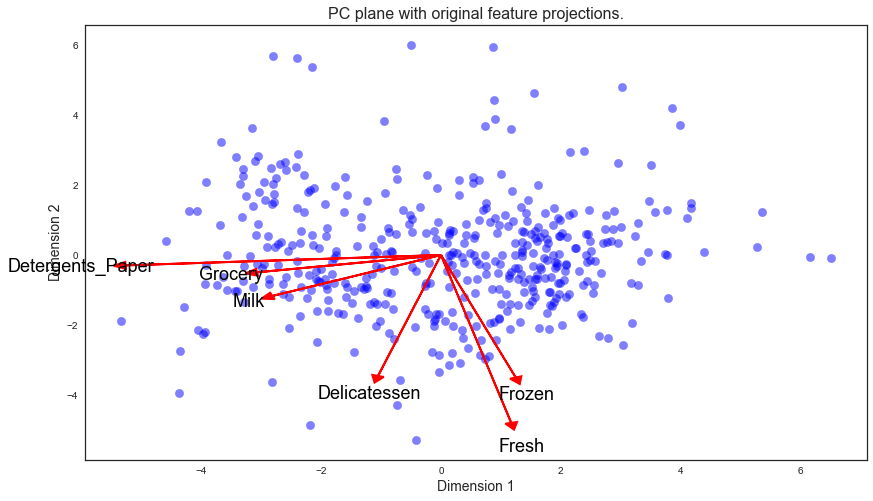

In [18]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**  The main difference between K-Means clustering (KMC) and Gaussian Mixture Models (GMM) are that GMMs make *soft assignments* by taking variance into account.  KMC works by calculating **Euclidian Distance**, whereas GMM uses variance to calcuate **Weighted Distance**.  

Other notable differences between the two include:

--KMC is more resilient in high-dimensional data sets than GMM.    
--KMC can tend to bias towards circular cluster shapes, whereas GMM does not.  
--KMC has a faster run time.  

Since the data does not have high dimensionality, and the data set is small enough that run time wont be a factor, I'll be using a *Gaussian Mixture Model*.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
k = [i for i in range(2, 21)]

# Abstracted to a function to make it easier to try different values for k
def GMM(k):
    clstr = GaussianMixture(n_components=k, random_state=0)
    clstr.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clstr.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clstr.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clstr.predict(pca_samples)


    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return score

# Create dataframe to store silhouette scores for each value of k.
k_df = pd.DataFrame(columns=["Sil_Score"])
display(k_df)
for i in k:
    sil_score = GMM(i)
    k_df = k_df.append(pd.DataFrame([sil_score],columns=['Sil_Score'],index=[i]))

display(k_df)

,Sil_Score


,Sil_Score
2,0.421917
3,0.374202
4,0.329080
5,0.305875
6,0.224815
7,0.274334
8,0.344370
9,0.334324
10,0.340632
11,0.319716


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 2 clusters resulted in the best silhouette score of 0.421917.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

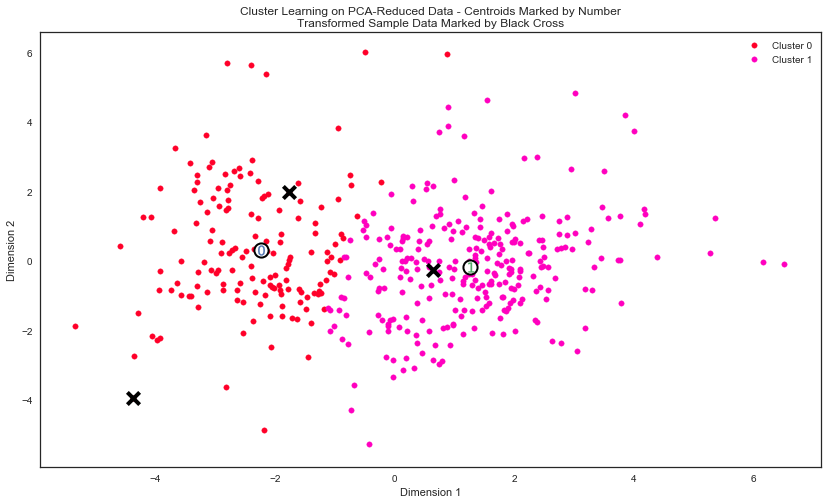

In [20]:
# Display the results of the clustering from implementation

clstr = GaussianMixture(n_components=2)
clstr.fit(reduced_data)
preds = clstr.predict(reduced_data)
centers = clstr.means_
sample_preds = clstr.predict(pca_samples)

vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3567.0,7860.0,12249.0,873.0,4713.0,966.0
Segment 1,8939.0,2108.0,2758.0,2073.0,352.0,730.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

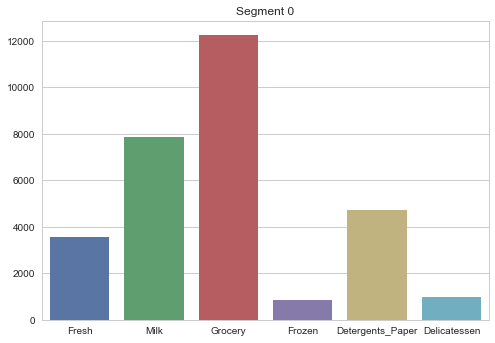

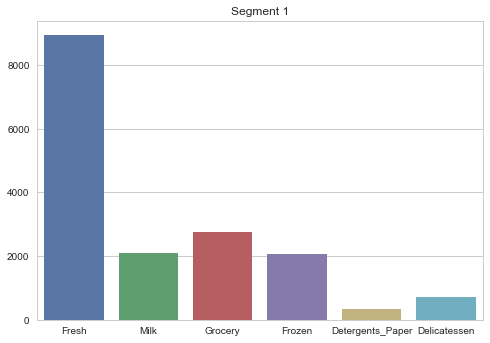

In [22]:
# Let's visualize each segment as bar graphs to get a more intuitive feel for the differences between each cluster
x0 = true_centers.columns.values
y0 = true_centers.iloc[0].values
x1 = true_centers.columns.values
y1 = true_centers.iloc[1].values

plt.figure()
sns.set_style("whitegrid")
plt.axes().set_title("Segment 0")
sns.barplot(x0, y0)

plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x1, y1)

**Answer:** 

**Segment 0:**  This segment most likely represents retail grocery stores.  The largest product purchased by this segment is *Grocery*, followed by *Milk* and *Fresh*.  There also seems to be a significant difference in the *Detergents/Paper* category between Segment 0 and Segment 1.  

**Segment 1:**  This segment most likely represents Hotels, Cafes, and Restaurants.  It makes sense, then, that these foodservice establishments would disproportionately purchase *Fresh* goods to cook with.  

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [23]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:** Yes, these predictions seem to make sense.  The hardest sample to judge is Sample Point 0, since the values for all 6 categories are quite high.  This makes it hard to intuitively figure out which segment this data point would belong in.  

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Intuitively, we can hypothesize that the customer segment made up of Restaurants, Cafes, and other smaller food service companies will probably react negatively to the change to a 3-day delivery service schedule.  I would recommend A/B testing this change by grabbing a small random sample of each customer segment and introducing this trend.  If, at any point, the customers in a given segment react negatively to the change, then stop the experiment for that segment. If that customer segment reacts positively to the change (or has a neutral reaction), then double the sample size and repeat the A/B test.  By testing each segment separately, we are able to make sure that we get a clear signal that is generalizable to that entire customer segment.  By starting with a small random sample from each segment, we limit the risk to our customer base, so that the damage is limited to a small subset of customers if the reaction is negative.  By doubling the size of the rollout with each successful positive test, we protect ourselves from possible variance or lurking variables not accounted for in our random samples.  There could be sub-segments within these larger segments that may react differently to the change than the group as a whole.  If this is the case, then starting with a small sample and doubling the sample size with each successful rollout will let us tease out these extra segments without risk of alienating customers with this new change.  The larger the segment that reacts positively to our A/B test, the more confidence we can have in rolling the change out to a larger portion of our remaining population until every company has been moved over to the change.  

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** By engineering a *"Customer Segment"* feature, we are essentially creating our own label that can be used for Supervised Learning (SL).  Using Unsupervised Learning techniques such as clustering is a great way to engineer a target variable such as *Customer Segment* that allows us to then incorporate supervised learning.  In this particular case, since we have only discovered two meaningful clusters dividing up our customer types, we now have a target variable that is a perfect candidate for binary classification techniques. Even if the shape of the data changes over time to include more than 2 clusters, there are still many robust SL algorithms that we could use to try to predict the correct customer segment, such as a Multinomial Naive Bayes Classifier, or a Neural Network that uses one-hot encoding to output label predictions.  

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

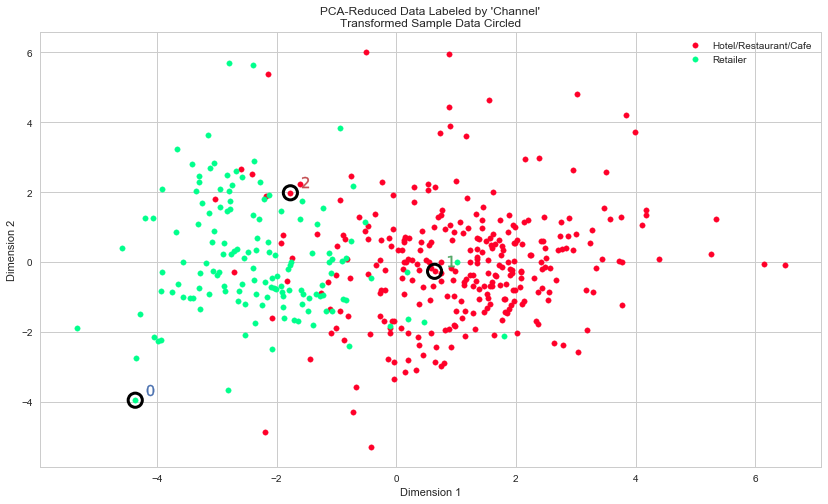

In [24]:
# print reduced_data.head()
# print outliers
# print pca_samples
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, mult_col_outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.